[*********************100%***********************]  1 of 1 completed


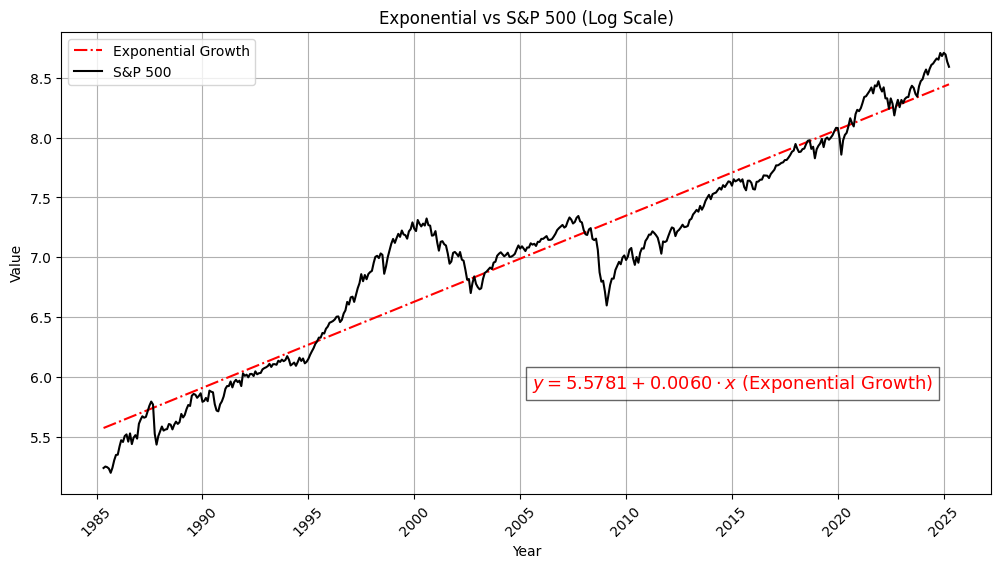

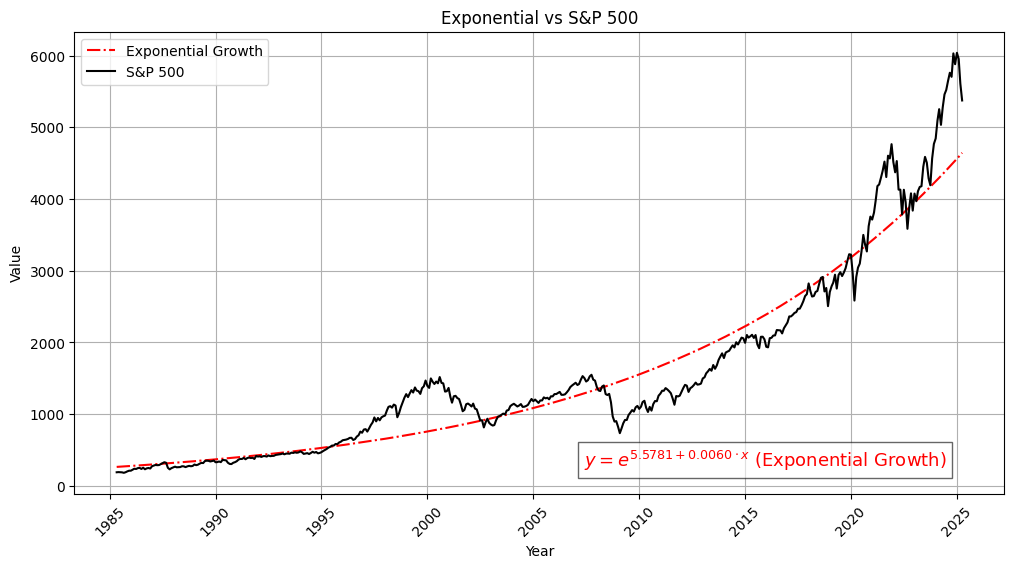

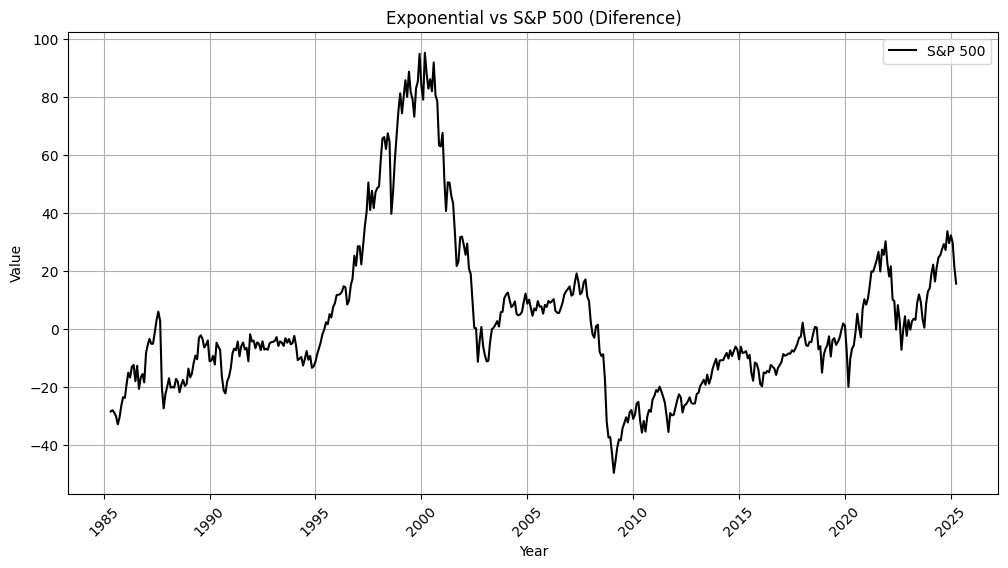

Preço teste: 4375.4666634425685
Preço teste 12 meses atrás: 4072.3703220119114
Rendimento médio do S&P 500: 7.442749982543717%
Crescimento médio mensal: 0.60%
Crescimento médio anual (CAGR): 7.44%
Totalidade de dinheiro alocado em Standart Investment: 30000.0.
Totalidade de carteira de investimento em Standart Investment: 210125.48078584898.
Totalidade de dinheiro alocado: 29796.428393373484.
Totalidade de carteira de investimento: 241970.79943558626.


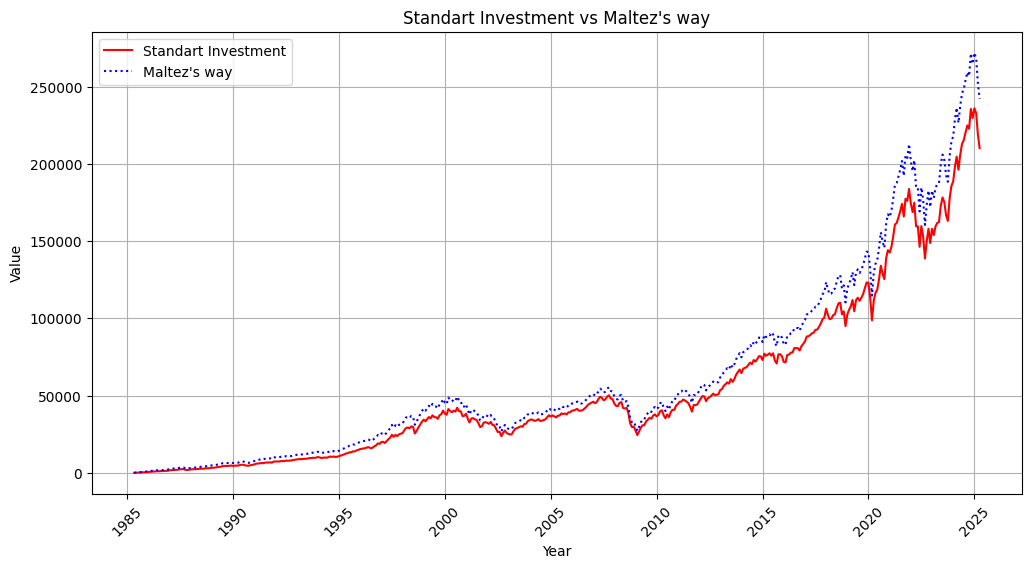

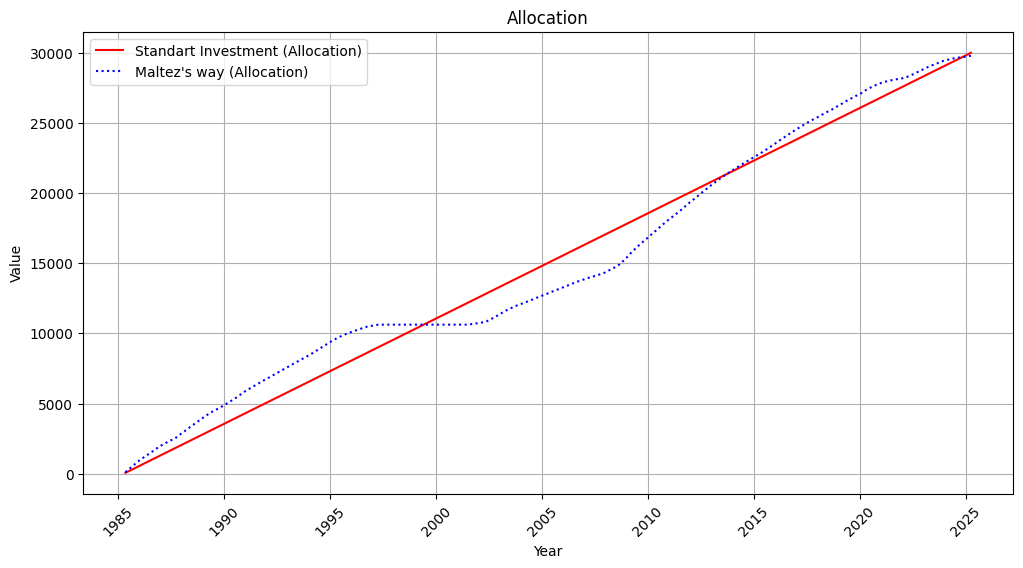

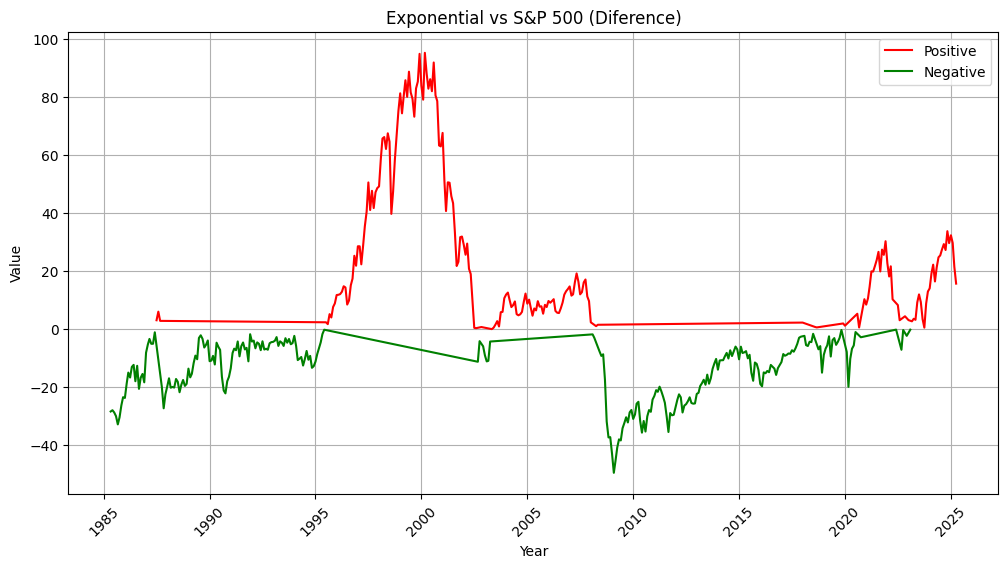

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np

####################################
# Objetivo: Regressão linear SP500 #
####################################

# Função para obter os dados históricos do S&P 500
def get_data(symbol='^GSPC', period='80y', interval='1mo'):
    data = yf.download(tickers=symbol, period=period, interval=interval)
    data = data[['Close']].reset_index()
    return data

# sp500_data
# Obter dados históricos do S&P 500
name, periodo, intervalo = '^GSPC', '40y', '1mo'
sp500_data = get_data(name, periodo, intervalo)
name = yf.Ticker(name).info['longName']

#sp500_data

# unit_of_time
# Criar um vetor de anos com base no número de dados
unit_of_time = np.arange(len(sp500_data))
#unit_of_time

# log_sp500
# Criar log do sp500
log_sp500 = np.log(sp500_data['Close'])
#log_sp500


# Regressão linear simples
# Sample data
x = unit_of_time
y_log = log_sp500
y = np.array(sp500_data['Close'])
y = y.flatten()
#y

# x,y
# Garantir que ambos são arrays numpy para evitar erros de broadcasting
x = np.array(x)
y_log = np.array(y_log)


#x, y_log, y

# x_mean,y_mean
# Compute means
x_mean = np.mean(x)
y_mean = np.mean(y)
y_mean_log = np.mean(y_log)

#x_mean,y_mean_log

# Example of NumPy's polyfit
coef_log = np.polyfit(x, y_log, 1)
y_pred_log = np.polyval(coef_log, x)
coef_log = coef_log.flatten()
y_pred = np.exp(y_pred_log)
#y_pred

# SP500 - exponential 

diference = 100* (y - y_pred)/y_pred
#diference

# Função que facilita o plot 
def improve_draw():
    # Melhorando visualmente
    plt.xticks(rotation=45)
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()
    plt.show()

# Plotando os gráficos
plt.figure(figsize=(12, 6))
plt.plot(sp500_data['Date'], y_pred_log, label='Exponential Growth', linestyle='dashdot', color='red')
plt.plot(sp500_data['Date'], log_sp500, label=f'{name}', linestyle='solid', color='black')
plt.title(f'Exponential vs {name} (Log Scale)')
x_pos = sp500_data['Date'].iloc[-10]
y_pos = min(y_pred_log) * 1.05  # um pouco abaixo do topo
plt.text(x_pos, y_pos, rf'$y ={{{coef_log[1]:.4f} + {coef_log[0]:.4f} \cdot x}}$ (Exponential Growth)',
         fontsize=13,
         ha='right', va='bottom',
         color='red',
         bbox=dict(facecolor='white', alpha=0.6))

improve_draw()


# Plotando os gráficos
plt.figure(figsize=(12, 6))
plt.plot(sp500_data['Date'], y_pred, label='Exponential Growth', linestyle='dashdot', color='red')
plt.plot(sp500_data['Date'], y, label=f'{name}', linestyle='solid', color='black')
plt.title(f'Exponential vs {name}')

x_pos = sp500_data['Date'].iloc[-10]
y_pos = min(y) * 1.05  # um pouco abaixo do topo
plt.text(x_pos,y_pos , rf'$y = e^{{{coef_log[1]:.4f} + {coef_log[0]:.4f} \cdot x}}$ (Exponential Growth)',
         fontsize=13,
         ha='right', va='bottom',
         color='red',
         bbox=dict(facecolor='white', alpha=0.6))

improve_draw()



# Plot SP500 - exponential 
# Plotando os gráficos
plt.figure(figsize=(12, 6))
plt.plot(sp500_data['Date'], diference, label=f'{name}', linestyle='solid', color='black')
plt.title(f'Exponential vs {name} (Diference)')

improve_draw()


# Calcular rendimento médio do sp500, apenas funciona com períodos em meses
y1 = y_pred[-11]
y2 = y_pred[-23]
percent = 100 * (y1 - y2) / y2
print(f"Preço teste: {y1}")
print(f"Preço teste 12 meses atrás: {y2}")

print(f"Rendimento médio do {name}: {percent}%")

# A inclinação B1 representa o crescimento logarítmico por "unidade de tempo"
# Como estás a usar intervalos mensais:
growth_rate = np.exp(coef_log[0]) - 1
cagr = (1 + growth_rate)**12 - 1  # anualizado

print(f"Crescimento médio mensal: {growth_rate * 100:.2f}%")
print(f"Crescimento médio anual (CAGR): {cagr * 100:.2f}%")

# MÉTODO TESTE
monthly_investment = 30000/len(y)
total_invest = np.zeros(len(y))
total_invest[0] = monthly_investment
for i in range(1, len(total_invest)):
    total_invest[i] = total_invest[i-1] + monthly_investment
total_invest


sp500_price = y / 10

stocks_owned = monthly_investment / sp500_price # Quantas ações consigo comprar com 500 euros
for i in range(len(stocks_owned)-1):
    stocks_owned[i+1] += stocks_owned[i] # Tornar a função acumulativa



porfolio = stocks_owned * sp500_price # Calcular evolução portfolio


# Método de weighted buy
allocation = (monthly_investment * (1 - 2.5 * diference/100)) # dinheiro investido mês a mês
total_allocation = np.zeros(len(allocation))
for i in range(len(allocation)):
    if allocation[i] < 0:
        allocation[i] = 0 # Não retirar dinheiro para não pagar impostos
    total_allocation[i] = sum(allocation[:i+1])

total_allocation 

#allocation

stocks_owned2 = allocation / sp500_price
#stocks_owned2

for i in range(len(stocks_owned2)-1):
    stocks_owned2[i+1] += stocks_owned2[i]
#stocks_owned2
porfolio2 = stocks_owned2 * sp500_price
porfolio2

print(f"Totalidade de dinheiro alocado em Standart Investment: {total_invest[-1]}.")
print(f"Totalidade de carteira de investimento em Standart Investment: {porfolio[-1]}.")

print(f"Totalidade de dinheiro alocado: {total_allocation[-1]}.")
print(f"Totalidade de carteira de investimento: {porfolio2[-1]}.")

plt.figure(figsize=(12, 6))
plt.plot(sp500_data['Date'], porfolio, label='Standart Investment', linestyle='solid', color='red')
plt.plot(sp500_data['Date'], porfolio2, label="Maltez's way", linestyle='dotted', color='blue')
plt.title("Standart Investment vs Maltez's way")
improve_draw()
plt.figure(figsize=(12, 6))
plt.plot(sp500_data['Date'], total_invest, label='Standart Investment (Allocation)', linestyle='solid', color='red')
plt.plot(sp500_data['Date'], total_allocation, label="Maltez's way (Allocation)", linestyle='dotted', color='blue')
plt.title("Allocation")
improve_draw()

# Ver se a função Diference tem média 0 num espaço grande de tempo
np.mean(diference) 
plt.figure(figsize=(12, 6))

# Dividir a linha em duas: positiva e negativa
positive_dates = sp500_data['Date'][diference >= 0]
positive_values = diference[diference >= 0]

negative_dates = sp500_data['Date'][diference < 0]
negative_values = diference[diference < 0]

# Desenhar linhas com cores diferentes
plt.plot(positive_dates, positive_values, color='red', label='Positive')
plt.plot(negative_dates, negative_values, color='green', label='Negative')

plt.title(f'Exponential vs {name} (Diference)')
improve_draw()

In [ ]:
# Vamos fazer com dados até 2023 estudar 
sp500_data_since2017 = sp500_data[(sp500_data['Date'] <= '2025-12-31') & (sp500_data['Date'] >= '2017-01-01')]
days_year = len(sp500_data_since2017)
sp500_data_since2017['Close'].values[0][0]

np.float64(2278.8701171875)

In [ ]:
# Obter as datas reais
datas = sp500_data_since2017['Date'].reset_index(drop=True)
dias = len(datas)

In [ ]:
# Parâmetros
preco_inicial = sp500_data_since2017['Close'].values[0]
mu = 0.8 # Ver o porque de ser este o valor, não deveria ser 0.0749???
sigma = 0.2
simulacoes = 100000

In [ ]:
# Matriz de preços
precos = np.zeros((dias, simulacoes))
precos[0] = preco_inicial

# Simulação
for s in range(simulacoes):
    for t in range(1, dias):
        epsilon = np.random.normal()
        drift = (mu - 0.5 * sigma**2) * (1/dias)
        diffusion = sigma * np.sqrt(1/dias) * epsilon
        precos[t, s] = precos[t - 1, s] * np.exp(drift + diffusion)

# Converter em DataFrame com índice de datas
precos_df = pd.DataFrame(precos, index=datas)
precos_df

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,2278.870117,2278.870117,2278.870117,2278.870117,2278.870117,2278.870117,2278.870117,2278.870117,2278.870117,2278.870117,...,2278.870117,2278.870117,2278.870117,2278.870117,2278.870117,2278.870117,2278.870117,2278.870117,2278.870117,2278.870117
2017-02-01,2280.598093,2265.428911,2346.225338,2289.462534,2291.272861,2266.220467,2352.729686,2248.840530,2309.538047,2321.066895,...,2333.800810,2243.785364,2231.805165,2368.006026,2312.596692,2354.445604,2282.652363,2345.850480,2309.904342,2318.702186
2017-03-01,2333.793706,2246.631341,2384.209867,2283.811184,2296.654938,2297.479798,2359.708348,2240.319056,2429.344749,2293.042124,...,2326.454173,2147.563319,2255.380657,2382.363965,2446.168169,2373.854599,2314.233810,2371.331410,2319.644435,2349.167231
2017-04-01,2495.195780,2267.076229,2375.467810,2296.894042,2320.791264,2371.648259,2393.880700,2221.651911,2478.156014,2315.702273,...,2312.097737,2078.266684,2307.489748,2350.123312,2373.338631,2328.971258,2346.761738,2380.137989,2331.402388,2350.309992
2017-05-01,2447.398843,2242.828571,2354.208063,2348.086140,2325.462179,2437.408274,2431.111228,2234.273031,2494.509345,2344.841482,...,2350.761090,2124.239560,2294.902435,2351.786357,2374.602768,2340.726800,2439.257996,2390.315660,2340.249736,2303.036327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-01,5693.545785,3212.384813,5005.971660,5706.072338,4779.450443,5164.299282,5253.230212,5813.511534,4412.866974,3814.266268,...,3299.736656,4211.753167,4260.848274,4895.962638,6109.765908,5189.054525,5487.369113,4321.938541,3223.766731,4878.428276
2025-01-01,5615.079350,3291.523812,5300.174237,5587.600161,4810.665621,5244.778234,5275.094654,5786.586961,4358.456850,3917.574409,...,3467.106437,4248.808733,4314.338750,4873.774441,6063.816056,5201.052275,5533.063615,4257.215028,3269.537949,4753.732625
2025-02-01,5592.798758,3329.890517,5212.002293,5535.425392,4852.675298,5299.321108,5507.129849,5833.703455,4374.606689,4004.815823,...,3577.168825,4336.306402,4339.000544,4753.262674,6154.588435,5323.568926,5567.590419,4397.190125,3277.285337,4936.074689


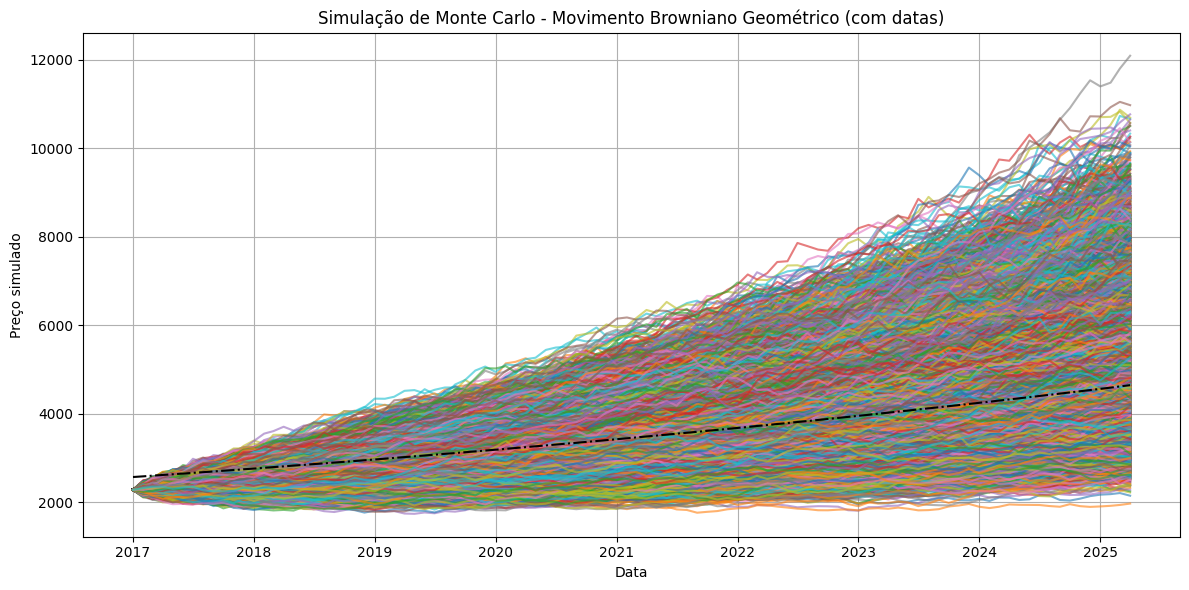

In [ ]:
##########################
# CHATGPT
# Colocar y_pred em 2024 até 2025
# Garante que a coluna 'Date' é datetime
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'])

# Filtra os dados com date > 01/01/2024
mask = sp500_data['Date'] > pd.Timestamp('2016-12-31')
dates_filtered = sp500_data.loc[mask, 'Date']
y_pred_filtered = y_pred[mask.values]  # y_pred deve ter mesmo comprimento que sp500_data

############################
# Plot com datas reais no eixo X
plt.figure(figsize=(12, 6))
plt.plot(precos_df, alpha=0.6)
plt.plot(dates_filtered, y_pred_filtered, label='Exponential Growth', linestyle='dashdot', color='black')
plt.title("Simulação de Monte Carlo - Movimento Browniano Geométrico (com datas)")
plt.xlabel("Data")
plt.ylabel("Preço simulado")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# MÉTODO TESTE
# monthly investment
monthly_investment =  45000 / len(y_pred_filtered)
monthly_investment = 500
monthly_investment

500

In [ ]:
total_invest = np.zeros(len(precos_df))
total_invest[0] = monthly_investment
for i in range(1, len(total_invest)):
    total_invest[i] = total_invest[i-1] + monthly_investment
total_invest

array([  500.,  1000.,  1500.,  2000.,  2500.,  3000.,  3500.,  4000.,
        4500.,  5000.,  5500.,  6000.,  6500.,  7000.,  7500.,  8000.,
        8500.,  9000.,  9500., 10000., 10500., 11000., 11500., 12000.,
       12500., 13000., 13500., 14000., 14500., 15000., 15500., 16000.,
       16500., 17000., 17500., 18000., 18500., 19000., 19500., 20000.,
       20500., 21000., 21500., 22000., 22500., 23000., 23500., 24000.,
       24500., 25000., 25500., 26000., 26500., 27000., 27500., 28000.,
       28500., 29000., 29500., 30000., 30500., 31000., 31500., 32000.,
       32500., 33000., 33500., 34000., 34500., 35000., 35500., 36000.,
       36500., 37000., 37500., 38000., 38500., 39000., 39500., 40000.,
       40500., 41000., 41500., 42000., 42500., 43000., 43500., 44000.,
       44500., 45000., 45500., 46000., 46500., 47000., 47500., 48000.,
       48500., 49000., 49500., 50000.])

In [ ]:
precos_df

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,2278.870117,2278.870117,2278.870117,2278.870117,2278.870117,2278.870117,2278.870117,2278.870117,2278.870117,2278.870117,...,2278.870117,2278.870117,2278.870117,2278.870117,2278.870117,2278.870117,2278.870117,2278.870117,2278.870117,2278.870117
2017-02-01,2280.598093,2265.428911,2346.225338,2289.462534,2291.272861,2266.220467,2352.729686,2248.840530,2309.538047,2321.066895,...,2333.800810,2243.785364,2231.805165,2368.006026,2312.596692,2354.445604,2282.652363,2345.850480,2309.904342,2318.702186
2017-03-01,2333.793706,2246.631341,2384.209867,2283.811184,2296.654938,2297.479798,2359.708348,2240.319056,2429.344749,2293.042124,...,2326.454173,2147.563319,2255.380657,2382.363965,2446.168169,2373.854599,2314.233810,2371.331410,2319.644435,2349.167231
2017-04-01,2495.195780,2267.076229,2375.467810,2296.894042,2320.791264,2371.648259,2393.880700,2221.651911,2478.156014,2315.702273,...,2312.097737,2078.266684,2307.489748,2350.123312,2373.338631,2328.971258,2346.761738,2380.137989,2331.402388,2350.309992
2017-05-01,2447.398843,2242.828571,2354.208063,2348.086140,2325.462179,2437.408274,2431.111228,2234.273031,2494.509345,2344.841482,...,2350.761090,2124.239560,2294.902435,2351.786357,2374.602768,2340.726800,2439.257996,2390.315660,2340.249736,2303.036327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-01,5693.545785,3212.384813,5005.971660,5706.072338,4779.450443,5164.299282,5253.230212,5813.511534,4412.866974,3814.266268,...,3299.736656,4211.753167,4260.848274,4895.962638,6109.765908,5189.054525,5487.369113,4321.938541,3223.766731,4878.428276
2025-01-01,5615.079350,3291.523812,5300.174237,5587.600161,4810.665621,5244.778234,5275.094654,5786.586961,4358.456850,3917.574409,...,3467.106437,4248.808733,4314.338750,4873.774441,6063.816056,5201.052275,5533.063615,4257.215028,3269.537949,4753.732625
2025-02-01,5592.798758,3329.890517,5212.002293,5535.425392,4852.675298,5299.321108,5507.129849,5833.703455,4374.606689,4004.815823,...,3577.168825,4336.306402,4339.000544,4753.262674,6154.588435,5323.568926,5567.590419,4397.190125,3277.285337,4936.074689


In [ ]:
sp500_price_monte = precos_df / 10
sp500_price_monte

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,227.887012,227.887012,227.887012,227.887012,227.887012,227.887012,227.887012,227.887012,227.887012,227.887012,...,227.887012,227.887012,227.887012,227.887012,227.887012,227.887012,227.887012,227.887012,227.887012,227.887012
2017-02-01,228.059809,226.542891,234.622534,228.946253,229.127286,226.622047,235.272969,224.884053,230.953805,232.106690,...,233.380081,224.378536,223.180516,236.800603,231.259669,235.444560,228.265236,234.585048,230.990434,231.870219
2017-03-01,233.379371,224.663134,238.420987,228.381118,229.665494,229.747980,235.970835,224.031906,242.934475,229.304212,...,232.645417,214.756332,225.538066,238.236397,244.616817,237.385460,231.423381,237.133141,231.964443,234.916723
2017-04-01,249.519578,226.707623,237.546781,229.689404,232.079126,237.164826,239.388070,222.165191,247.815601,231.570227,...,231.209774,207.826668,230.748975,235.012331,237.333863,232.897126,234.676174,238.013799,233.140239,235.030999
2017-05-01,244.739884,224.282857,235.420806,234.808614,232.546218,243.740827,243.111123,223.427303,249.450934,234.484148,...,235.076109,212.423956,229.490243,235.178636,237.460277,234.072680,243.925800,239.031566,234.024974,230.303633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-01,569.354579,321.238481,500.597166,570.607234,477.945044,516.429928,525.323021,581.351153,441.286697,381.426627,...,329.973666,421.175317,426.084827,489.596264,610.976591,518.905453,548.736911,432.193854,322.376673,487.842828
2025-01-01,561.507935,329.152381,530.017424,558.760016,481.066562,524.477823,527.509465,578.658696,435.845685,391.757441,...,346.710644,424.880873,431.433875,487.377444,606.381606,520.105227,553.306361,425.721503,326.953795,475.373263
2025-02-01,559.279876,332.989052,521.200229,553.542539,485.267530,529.932111,550.712985,583.370346,437.460669,400.481582,...,357.716882,433.630640,433.900054,475.326267,615.458844,532.356893,556.759042,439.719012,327.728534,493.607469


In [ ]:
######################## Chat GPT
# Inicializar o array para guardar a evolução de ações compradas por simulação
stocks_owned_matrix = np.zeros_like(sp500_price_monte)

# Iterar por cada simulação (coluna)
for i in range(sp500_price_monte.shape[1]):
    prices = sp500_price_monte.iloc[:, i].values  # preços da simulação i
    stocks = np.zeros_like(prices)
    stocks[0] = monthly_investment / prices[0]
    
    for t in range(1, len(prices)):
        stocks[t] = stocks[t-1] + (monthly_investment / prices[t])
    
    stocks_owned_matrix[:, i] = stocks  # guardar resultado
#######################

In [ ]:
pd.DataFrame(stocks_owned_matrix)

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
0,2.194070,2.194070,2.194070,2.194070,2.194070,2.194070,2.194070,2.194070,2.194070,2.194070,...,2.194070,2.194070,2.194070,2.194070,2.194070,2.194070,2.194070,2.194070,2.194070,2.194070
1,4.386477,4.401157,4.325152,4.377988,4.376263,4.400386,4.319261,4.417438,4.359005,4.348252,...,4.336498,4.422447,4.434409,4.305551,4.356142,4.317712,4.384504,4.325493,4.358662,4.350448
2,6.528912,6.626712,6.422283,6.567311,6.553342,6.576684,6.438167,6.649263,6.417173,6.528761,...,6.485691,6.750667,6.651329,6.404307,6.400155,6.423991,6.545046,6.434013,6.514164,6.478862
3,8.532762,8.832195,8.527132,8.744164,8.707780,8.684923,8.526826,8.899840,8.434802,8.687933,...,8.648229,9.156518,8.818186,8.531855,8.506892,8.570862,8.675642,8.534732,8.658796,8.606241
4,10.575748,11.061523,10.650988,10.873558,10.857890,10.736282,10.583498,11.137705,10.439204,10.820273,...,10.775200,11.510301,10.996928,10.657898,10.612507,10.706950,10.725445,10.626505,10.795320,10.777288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,136.592521,179.465442,154.260555,154.040096,160.948914,130.538728,136.180740,154.767808,151.409144,158.530197,...,169.244663,157.027365,144.914387,139.619750,131.659711,152.119301,140.764684,156.216386,177.747796,157.434602
96,137.482980,180.984496,155.203920,154.934935,161.988271,131.492058,137.128590,155.631875,152.556339,159.806497,...,170.686787,158.204166,146.073313,140.645649,132.484274,153.080645,141.668342,157.390863,179.277064,158.486407
97,138.376987,182.486047,156.163244,155.838208,163.018630,132.435575,138.036504,156.488963,153.699299,161.054993,...,172.084541,159.357221,147.225652,141.697558,133.296676,154.019864,142.566397,158.527952,180.802717,159.499357
98,139.278571,184.002691,157.128880,156.728455,164.012564,133.373881,138.968137,157.367932,154.837240,162.295929,...,173.445332,160.510927,148.320989,142.739074,134.092668,154.963371,143.433289,159.641690,182.323994,160.484265


In [ ]:
porfolio = stocks_owned_matrix * sp500_price_monte # Calcular evolução portfolio
pd.DataFrame(porfolio)

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
2017-02-01,1000.379130,997.050906,1014.778205,1002.324050,1002.721249,997.224579,1016.205305,993.411299,1006.728758,1009.258267,...,1012.052177,992.302160,989.673621,1019.557040,1007.399846,1016.581789,1000.829851,1014.695959,1006.809125,1008.739434
2017-03-01,1523.713264,1488.777799,1531.207093,1499.849896,1505.076587,1510.979892,1519.219571,1489.646991,1558.952557,1497.072392,...,1508.866310,1449.748472,1500.127958,1525.738924,1565.585471,1524.962034,1514.676750,1525.717717,1511.054502,1521.993094
2017-04-01,2129.091250,2002.326037,2025.592696,2008.441816,2020.893948,2059.758146,2041.220301,1977.234716,2090.275591,2011.866662,...,1999.555169,1902.968622,2034.787431,2005.091021,2018.973440,1996.129016,2035.966429,2031.383882,2018.713826,2022.733474
2017-05-01,2588.307259,2480.910032,2507.464229,2553.205026,2524.961277,2616.870210,2572.966122,2488.467311,2604.069302,2537.182612,...,2532.992124,2445.063768,2523.687703,2506.509907,2520.048828,2506.204528,2616.212869,2540.070250,2526.374564,2482.048617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-01,77769.577100,57651.206194,77222.396672,87896.393076,76924.735718,67414.106111,71538.877629,89974.443530,66814.841183,60467.638119,...,55846.281728,66136.050365,61745.821671,68357.308081,80441.001089,78935.534703,77242.777710,67515.761893,57301.743024,76803.341273
2025-01-01,77197.784273,59571.477742,82260.781956,86571.446535,77927.140627,68964.668113,72336.629217,90057.737802,66491.022148,62605.384117,...,59178.925939,67217.924157,63020.975632,68547.517040,80336.026674,79618.043632,78385.994923,67004.674570,58615.316339,75340.200255
2025-02-01,77391.464063,60765.855610,81392.318821,86263.077085,79107.648124,70181.863596,76018.495132,91291.020644,67237.398188,64499.558589,...,61557.545475,69102.173729,63881.218627,67352.571468,82038.617948,81993.536436,79375.130440,69707.754688,59254.209233,78730.074099


In [ ]:
len(y_pred_filtered)

100

In [ ]:
precos_df

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,2278.870117,2278.870117,2278.870117,2278.870117,2278.870117,2278.870117,2278.870117,2278.870117,2278.870117,2278.870117,...,2278.870117,2278.870117,2278.870117,2278.870117,2278.870117,2278.870117,2278.870117,2278.870117,2278.870117,2278.870117
2017-02-01,2280.598093,2265.428911,2346.225338,2289.462534,2291.272861,2266.220467,2352.729686,2248.840530,2309.538047,2321.066895,...,2333.800810,2243.785364,2231.805165,2368.006026,2312.596692,2354.445604,2282.652363,2345.850480,2309.904342,2318.702186
2017-03-01,2333.793706,2246.631341,2384.209867,2283.811184,2296.654938,2297.479798,2359.708348,2240.319056,2429.344749,2293.042124,...,2326.454173,2147.563319,2255.380657,2382.363965,2446.168169,2373.854599,2314.233810,2371.331410,2319.644435,2349.167231
2017-04-01,2495.195780,2267.076229,2375.467810,2296.894042,2320.791264,2371.648259,2393.880700,2221.651911,2478.156014,2315.702273,...,2312.097737,2078.266684,2307.489748,2350.123312,2373.338631,2328.971258,2346.761738,2380.137989,2331.402388,2350.309992
2017-05-01,2447.398843,2242.828571,2354.208063,2348.086140,2325.462179,2437.408274,2431.111228,2234.273031,2494.509345,2344.841482,...,2350.761090,2124.239560,2294.902435,2351.786357,2374.602768,2340.726800,2439.257996,2390.315660,2340.249736,2303.036327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-01,5693.545785,3212.384813,5005.971660,5706.072338,4779.450443,5164.299282,5253.230212,5813.511534,4412.866974,3814.266268,...,3299.736656,4211.753167,4260.848274,4895.962638,6109.765908,5189.054525,5487.369113,4321.938541,3223.766731,4878.428276
2025-01-01,5615.079350,3291.523812,5300.174237,5587.600161,4810.665621,5244.778234,5275.094654,5786.586961,4358.456850,3917.574409,...,3467.106437,4248.808733,4314.338750,4873.774441,6063.816056,5201.052275,5533.063615,4257.215028,3269.537949,4753.732625
2025-02-01,5592.798758,3329.890517,5212.002293,5535.425392,4852.675298,5299.321108,5507.129849,5833.703455,4374.606689,4004.815823,...,3577.168825,4336.306402,4339.000544,4753.262674,6154.588435,5323.568926,5567.590419,4397.190125,3277.285337,4936.074689


In [ ]:
#diference = (precos_df - y_pred_filtered) / y_pred_filtered, 
# mas temos de por y_pred do mesmo tamanho do dataset
diference = 100 * (precos_df - y_pred_filtered[:, np.newaxis]) / y_pred_filtered[:, np.newaxis] # Em percentagem
diference

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,-11.299623,-11.299623,-11.299623,-11.299623,-11.299623,-11.299623,-11.299623,-11.299623,-11.299623,-11.299623,...,-11.299623,-11.299623,-11.299623,-11.299623,-11.299623,-11.299623,-11.299623,-11.299623,-11.299623,-11.299623
2017-02-01,-11.761817,-12.348725,-9.222646,-11.418844,-11.348801,-12.318099,-8.970987,-12.990542,-10.642107,-10.196046,...,-9.703361,-13.186131,-13.649655,-8.379933,-10.523765,-8.904597,-11.682335,-9.237149,-10.627934,-10.287539
2017-03-01,-10.242206,-13.594473,-8.303198,-12.164535,-11.670564,-11.638840,-9.245527,-13.837244,-6.567309,-11.809513,...,-10.524484,-17.404633,-13.257974,-8.374192,-5.920279,-8.701462,-10.994480,-8.798504,-10.786387,-9.650939
2017-04-01,-4.607058,-13.328215,-9.184336,-12.188261,-11.274655,-9.330359,-8.480399,-15.064816,-5.258499,-11.469211,...,-11.607014,-20.546526,-11.783181,-10.153272,-9.265735,-10.961929,-10.281787,-9.005792,-10.868985,-10.146135
2017-05-01,-6.992435,-14.766641,-10.533929,-10.766578,-11.626348,-7.372103,-7.611407,-15.091774,-5.202113,-10.889884,...,-10.664923,-19.273334,-12.787698,-10.625960,-9.758877,-11.046252,-7.301809,-9.161746,-11.064382,-12.478589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-01,25.536461,-29.170426,10.376203,25.812658,5.381658,13.867154,15.827984,28.181574,-2.701107,-15.899598,...,-27.244414,-7.135447,-6.052953,7.950624,34.713659,14.412980,20.990490,-4.705980,-28.919468,7.564011
2025-01-01,23.067922,-27.858367,16.166022,22.465650,5.437267,14.951886,15.616343,26.826922,-4.473972,-14.136967,...,-24.010053,-6.877173,-5.440926,6.820448,32.903063,13.993526,21.270351,-6.692929,-28.340239,4.189444
2025-02-01,21.848467,-27.452771,13.552180,20.598492,5.723641,15.454566,19.982027,27.096978,-4.691883,-12.748395,...,-22.065399,-5.526319,-5.467622,3.557770,34.087994,15.982845,21.299261,-4.199865,-28.598862,7.540636


In [ ]:
# Método de weighted buy
allocation = (monthly_investment * (1 - 2.5 * diference/100)) # dinheiro investido mês a 
allocation

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,641.245283,641.245283,641.245283,641.245283,641.245283,641.245283,641.245283,641.245283,641.245283,641.245283,...,641.245283,641.245283,641.245283,641.245283,641.245283,641.245283,641.245283,641.245283,641.245283,641.245283
2017-02-01,647.022709,654.359058,615.283070,642.735554,641.860016,653.976234,612.137339,662.381781,633.026331,627.450576,...,621.292008,664.826637,670.620682,604.749164,631.547063,611.307460,646.029192,615.464364,632.849178,628.594232
2017-03-01,628.027570,669.930918,603.789976,652.056691,645.882050,645.485498,615.569093,672.965552,582.091360,647.618912,...,631.556053,717.557916,665.724680,604.677394,574.003493,608.768276,637.430999,609.981301,634.829838,620.636740
2017-04-01,557.588226,666.602694,614.804194,652.353266,640.933189,616.629493,606.004986,688.310205,565.731242,643.365131,...,645.087678,756.831575,647.289758,626.915900,615.821693,637.024108,628.522339,612.572395,635.862313,626.826689
2017-05-01,587.405442,684.583017,631.674113,634.582227,645.329349,592.151290,595.142593,688.647179,565.026412,636.123546,...,633.311538,740.916679,659.846228,632.824503,621.985961,638.078154,591.272611,614.521823,638.304775,655.982363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-01,180.794241,864.630331,370.297464,177.341781,432.729279,326.660577,302.150204,147.730320,533.763839,698.744979,...,840.555173,589.193084,575.661916,400.617198,66.079257,319.837751,237.618869,558.824746,861.493345,405.449866
2025-01-01,211.650974,848.229582,297.924728,219.179377,432.034160,313.101430,304.795717,164.663470,555.924648,676.712091,...,800.125657,585.964664,568.011572,414.744397,88.711718,325.080920,234.120617,583.661613,854.252993,447.631948
2025-02-01,226.894162,843.159632,330.597754,242.518845,428.454492,306.817925,250.224666,161.287770,558.648536,659.354936,...,775.817492,569.078983,568.345279,455.527869,73.900076,300.214435,233.759235,552.498313,857.485779,405.742053


In [ ]:
#total_allocation = np.zeros_like(allocation)

allocation = np.where(allocation < 0, 0, allocation)
total_allocation = np.cumsum(allocation, axis=0)

In [ ]:
pd.DataFrame(allocation)

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
0,641.245283,641.245283,641.245283,641.245283,641.245283,641.245283,641.245283,641.245283,641.245283,641.245283,...,641.245283,641.245283,641.245283,641.245283,641.245283,641.245283,641.245283,641.245283,641.245283,641.245283
1,647.022709,654.359058,615.283070,642.735554,641.860016,653.976234,612.137339,662.381781,633.026331,627.450576,...,621.292008,664.826637,670.620682,604.749164,631.547063,611.307460,646.029192,615.464364,632.849178,628.594232
2,628.027570,669.930918,603.789976,652.056691,645.882050,645.485498,615.569093,672.965552,582.091360,647.618912,...,631.556053,717.557916,665.724680,604.677394,574.003493,608.768276,637.430999,609.981301,634.829838,620.636740
3,557.588226,666.602694,614.804194,652.353266,640.933189,616.629493,606.004986,688.310205,565.731242,643.365131,...,645.087678,756.831575,647.289758,626.915900,615.821693,637.024108,628.522339,612.572395,635.862313,626.826689
4,587.405442,684.583017,631.674113,634.582227,645.329349,592.151290,595.142593,688.647179,565.026412,636.123546,...,633.311538,740.916679,659.846228,632.824503,621.985961,638.078154,591.272611,614.521823,638.304775,655.982363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,180.794241,864.630331,370.297464,177.341781,432.729279,326.660577,302.150204,147.730320,533.763839,698.744979,...,840.555173,589.193084,575.661916,400.617198,66.079257,319.837751,237.618869,558.824746,861.493345,405.449866
96,211.650974,848.229582,297.924728,219.179377,432.034160,313.101430,304.795717,164.663470,555.924648,676.712091,...,800.125657,585.964664,568.011572,414.744397,88.711718,325.080920,234.120617,583.661613,854.252993,447.631948
97,226.894162,843.159632,330.597754,242.518845,428.454492,306.817925,250.224666,161.287770,558.648536,659.354936,...,775.817492,569.078983,568.345279,455.527869,73.900076,300.214435,233.759235,552.498313,857.485779,405.742053
98,248.702527,857.539693,348.286113,229.585374,388.192694,307.458674,297.125565,210.074956,560.531463,659.253936,...,755.324488,576.785366,514.264803,450.407968,49.550499,315.410100,188.624047,534.681985,860.257039,375.713126


In [ ]:
pd.DataFrame(total_allocation) 

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
0,641.245283,641.245283,641.245283,641.245283,641.245283,641.245283,641.245283,641.245283,641.245283,641.245283,...,641.245283,641.245283,641.245283,641.245283,641.245283,641.245283,641.245283,641.245283,641.245283,641.245283
1,1288.267992,1295.604341,1256.528352,1283.980837,1283.105299,1295.221516,1253.382621,1303.627064,1274.271614,1268.695858,...,1262.537290,1306.071920,1311.865964,1245.994447,1272.792346,1252.552743,1287.274475,1256.709647,1274.094461,1269.839515
2,1916.295561,1965.535258,1860.318328,1936.037528,1928.987349,1940.707014,1868.951714,1976.592616,1856.362974,1916.314770,...,1894.093344,2023.629836,1977.590644,1850.671841,1846.795839,1861.321019,1924.705473,1866.690947,1908.924299,1890.476255
3,2473.883788,2632.137952,2475.122523,2588.390794,2569.920537,2557.336507,2474.956700,2664.902821,2422.094217,2559.679902,...,2539.181022,2780.461411,2624.880402,2477.587742,2462.617531,2498.345127,2553.227813,2479.263342,2544.786612,2517.302944
4,3061.289230,3316.720969,3106.796636,3222.973021,3215.249886,3149.487797,3070.099293,3353.550000,2987.120629,3195.803447,...,3172.492560,3521.378091,3284.726630,3110.412244,3084.603492,3136.423282,3144.500424,3093.785165,3183.091387,3173.285307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,38320.872087,73111.268645,55061.839463,54866.590648,60210.927519,32700.383051,38072.512288,53490.335195,53772.432529,60278.731766,...,67365.573288,57938.306239,49406.068314,40613.784845,33976.920620,53666.535437,43671.640319,57899.639719,72062.783893,58180.742200
96,38532.523061,73959.498228,55359.764191,55085.770025,60642.961678,33013.484481,38377.308005,53654.998664,54328.357178,60955.443857,...,68165.698945,58524.270903,49974.079886,41028.529242,34065.632338,53991.616357,43905.760935,58483.301332,72917.036886,58628.374148
97,38759.417223,74802.657859,55690.361944,55328.288871,61071.416170,33320.302406,38627.532672,53816.286434,54887.005714,61614.798793,...,68941.516437,59093.349886,50542.425165,41484.057111,34139.532414,54291.830792,44139.520170,59035.799645,73774.522665,59034.116202
98,39008.119750,75660.197552,56038.648058,55557.874245,61459.608865,33627.761080,38924.658237,54026.361390,55447.537177,62274.052728,...,69696.840925,59670.135253,51056.689968,41934.465079,34189.082913,54607.240891,44328.144217,59570.481630,74634.779704,59409.829327


In [ ]:
sp500_price_monte

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,227.887012,227.887012,227.887012,227.887012,227.887012,227.887012,227.887012,227.887012,227.887012,227.887012,...,227.887012,227.887012,227.887012,227.887012,227.887012,227.887012,227.887012,227.887012,227.887012,227.887012
2017-02-01,228.059809,226.542891,234.622534,228.946253,229.127286,226.622047,235.272969,224.884053,230.953805,232.106690,...,233.380081,224.378536,223.180516,236.800603,231.259669,235.444560,228.265236,234.585048,230.990434,231.870219
2017-03-01,233.379371,224.663134,238.420987,228.381118,229.665494,229.747980,235.970835,224.031906,242.934475,229.304212,...,232.645417,214.756332,225.538066,238.236397,244.616817,237.385460,231.423381,237.133141,231.964443,234.916723
2017-04-01,249.519578,226.707623,237.546781,229.689404,232.079126,237.164826,239.388070,222.165191,247.815601,231.570227,...,231.209774,207.826668,230.748975,235.012331,237.333863,232.897126,234.676174,238.013799,233.140239,235.030999
2017-05-01,244.739884,224.282857,235.420806,234.808614,232.546218,243.740827,243.111123,223.427303,249.450934,234.484148,...,235.076109,212.423956,229.490243,235.178636,237.460277,234.072680,243.925800,239.031566,234.024974,230.303633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-01,569.354579,321.238481,500.597166,570.607234,477.945044,516.429928,525.323021,581.351153,441.286697,381.426627,...,329.973666,421.175317,426.084827,489.596264,610.976591,518.905453,548.736911,432.193854,322.376673,487.842828
2025-01-01,561.507935,329.152381,530.017424,558.760016,481.066562,524.477823,527.509465,578.658696,435.845685,391.757441,...,346.710644,424.880873,431.433875,487.377444,606.381606,520.105227,553.306361,425.721503,326.953795,475.373263
2025-02-01,559.279876,332.989052,521.200229,553.542539,485.267530,529.932111,550.712985,583.370346,437.460669,400.481582,...,357.716882,433.630640,433.900054,475.326267,615.458844,532.356893,556.759042,439.719012,327.728534,493.607469


In [ ]:
stocks_owned2 = allocation / sp500_price_monte
stocks_owned2

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,2.813874,2.813874,2.813874,2.813874,2.813874,2.813874,2.813874,2.813874,2.813874,2.813874,...,2.813874,2.813874,2.813874,2.813874,2.813874,2.813874,2.813874,2.813874,2.813874,2.813874
2017-02-01,2.837075,2.888455,2.622438,2.807364,2.801325,2.885757,2.601818,2.945437,2.740922,2.703285,...,2.662147,2.962969,3.004835,2.553833,2.730900,2.596397,2.830169,2.623630,2.739720,2.710974
2017-03-01,2.691016,2.981935,2.532453,2.855125,2.812273,2.809537,2.608666,3.003883,2.396084,2.824278,...,2.714672,3.341265,2.951718,2.538140,2.346541,2.564472,2.754393,2.572316,2.736755,2.641944
2017-04-01,2.234647,2.940363,2.588139,2.840154,2.761701,2.600004,2.531475,3.098191,2.282872,2.778272,...,2.790054,3.641648,2.805169,2.667587,2.594749,2.735217,2.678254,2.573684,2.727381,2.666996
2017-05-01,2.400121,3.052320,2.683170,2.702551,2.775058,2.429430,2.448027,3.082198,2.265080,2.712864,...,2.694070,3.487915,2.875269,2.690825,2.619326,2.725983,2.423986,2.570881,2.727507,2.848337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-01,0.317542,2.691553,0.739711,0.310795,0.905395,0.632536,0.575170,0.254115,1.209562,1.831925,...,2.547340,1.398926,1.351050,0.818260,0.108154,0.616370,0.433029,1.292996,2.672319,0.831108
2025-01-01,0.376933,2.577012,0.562104,0.392260,0.898076,0.596977,0.577801,0.284561,1.275508,1.727375,...,2.307762,1.379127,1.316567,0.850972,0.146297,0.625029,0.423130,1.370994,2.612764,0.941643
2025-02-01,0.405690,2.532094,0.634301,0.438121,0.882924,0.578976,0.454365,0.276476,1.277026,1.646405,...,2.168803,1.312359,1.309853,0.958348,0.120073,0.563935,0.419857,1.256480,2.616451,0.821993


In [ ]:
stocks_owned2 = np.cumsum(stocks_owned2, axis=0)
stocks_owned2

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,2.813874,2.813874,2.813874,2.813874,2.813874,2.813874,2.813874,2.813874,2.813874,2.813874,...,2.813874,2.813874,2.813874,2.813874,2.813874,2.813874,2.813874,2.813874,2.813874,2.813874
2017-02-01,5.650948,5.702329,5.436312,5.621238,5.615199,5.699631,5.415691,5.759311,5.554796,5.517159,...,5.476020,5.776843,5.818709,5.367707,5.544774,5.410270,5.644043,5.437504,5.553594,5.524848
2017-03-01,8.341964,8.684264,7.968765,8.476363,8.427472,8.509168,8.024357,8.763193,7.950879,8.341437,...,8.190693,9.118108,8.770427,7.905847,7.891315,7.974742,8.398436,8.009819,8.290349,8.166792
2017-04-01,10.576611,11.624627,10.556904,11.316517,11.189173,11.109172,10.555833,11.861384,10.233751,11.119709,...,10.980746,12.759756,11.575595,10.573434,10.486064,10.709959,11.076690,10.583504,11.017730,10.833788
2017-05-01,12.976733,14.676947,13.240075,14.019068,13.964231,13.538602,13.003860,14.943582,12.498832,13.832573,...,13.674817,16.247671,14.450864,13.264259,13.105390,13.435942,13.500675,13.154385,13.745237,13.682125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-01,121.680847,271.736073,183.518967,182.747361,206.928223,100.492574,120.239614,185.294352,173.539029,198.462713,...,235.963344,193.202804,150.807380,132.276150,104.416011,176.024578,136.283417,190.364375,265.724309,194.628131
2025-01-01,122.057780,274.313085,184.081071,183.139621,207.826298,101.089551,120.817415,185.578912,174.814537,200.190088,...,238.271106,194.581930,152.123947,133.127122,104.562308,176.649607,136.706547,191.735369,268.337073,195.569774
2025-02-01,122.463470,276.845179,184.715372,183.577742,208.709223,101.668527,121.271780,185.855388,176.091563,201.836493,...,240.439909,195.894289,153.433800,134.085470,104.682381,177.213542,137.126405,192.991850,270.953525,196.391767


In [ ]:
porfolio2 = stocks_owned2 * sp500_price_monte
porfolio2

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,641.245283,641.245283,641.245283,641.245283,641.245283,641.245283,641.245283,641.245283,641.245283,641.245283,...,641.245283,641.245283,641.245283,641.245283,641.245283,641.245283,641.245283,641.245283,641.245283,641.245283
2017-02-01,1288.754222,1291.822155,1275.481261,1286.961409,1286.595275,1291.662064,1274.165772,1295.177117,1282.901182,1280.569499,...,1277.994094,1296.199513,1298.622481,1271.076166,1282.282578,1273.818731,1288.338751,1275.557075,1282.827100,1281.047756
2017-03-01,1946.842358,1951.034079,1899.920812,1935.841342,1935.499467,1954.964228,1893.514293,1963.234887,1931.542717,1912.726699,...,1905.527114,1958.171468,1978.065054,1883.460481,1930.348435,1893.087798,1943.594453,1899.393641,1923.066191,1918.515971
2017-04-01,2639.071618,2635.391654,2507.758666,2599.284114,2596.773477,2634.704912,2526.940395,2635.186713,2536.083207,2574.993652,...,2538.855876,2651.817621,2671.056707,2484.887414,2488.698043,2494.318600,2599.435165,2519.019947,2568.676257,2546.275930
2017-05-01,3175.924097,3291.787673,3116.989067,3291.797967,3247.329193,3299.910136,3161.382909,3338.804287,3117.845211,3243.519151,...,3214.622662,3451.394569,3316.332371,3119.470327,3112.009585,3144.986890,3293.163011,3144.313311,3216.728801,3151.043007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-01,69279.547503,87292.083493,91869.074846,104276.965894,98900.318580,51897.372661,63164.637086,107721.084985,76580.465018,75698.962981,...,77861.689530,81372.251965,64256.736421,64761.909065,63795.738682,91340.113253,74783.741432,82274.312981,85663.318844,94947.937555
2025-01-01,68536.412238,90290.805159,97566.174881,102331.097521,99978.282883,53019.227791,63732.330009,107386.851308,76192.161652,78425.956471,...,82611.128504,82674.140555,65631.423852,64883.156545,63404.660379,91876.384054,75640.602338,81625.869490,87733.824373,92968.641356
2025-02-01,68491.354447,92186.413700,96273.694050,101618.089615,101279.808946,53877.417190,66785.943922,108422.521862,77033.132861,80831.798038,...,86009.414678,84945.766071,66574.934074,63734.345940,64427.697404,94340.850325,76346.365598,84862.185481,88799.201289,96940.443016


In [ ]:
# Supondo que 'porfolio2' é o teu DataFrame com datas como índice e simulações nas colunas
final_values2 = porfolio2.iloc[-1]  # pega os valores da última data
final_values1 = porfolio.iloc[-1]

In [ ]:
final_values1

0        78593.309735
1        61526.468783
2        81203.998552
3        89692.849045
4        85964.896736
             ...     
99995    86158.025203
99996    83484.149659
99997    72134.628117
99998    59571.461152
99999    85049.661746
Name: 2025-04-01 00:00:00, Length: 100000, dtype: float64

In [ ]:
final_values2

0         69157.743002
1         93538.901141
2         95586.240878
3        104923.790184
4        109505.659949
             ...      
99995     98548.637843
99996     79717.611339
99997     87676.494281
99998     89512.859027
99999    104189.407503
Name: 2025-04-01 00:00:00, Length: 100000, dtype: float64

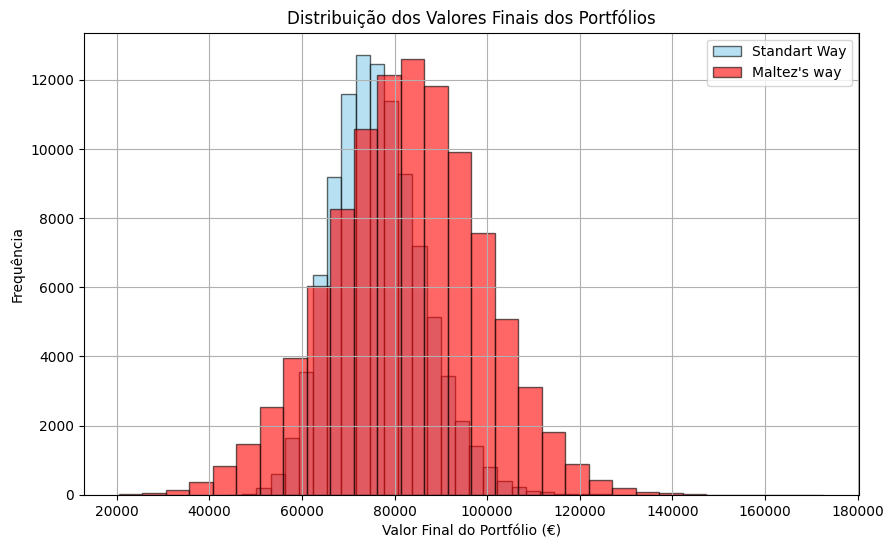

In [ ]:
plt.figure(figsize=(10, 6))

# Histograma do primeiro portfólio
plt.hist(final_values1, bins=30, edgecolor='black', color='skyblue', alpha=0.6, label='Standart Way')

# Histograma do segundo portfólio
plt.hist(final_values2, bins=30, edgecolor='black', color='red', alpha=0.6, label="Maltez's way")

plt.title('Distribuição dos Valores Finais dos Portfólios')
plt.xlabel('Valor Final do Portfólio (€)')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True)
plt.show()

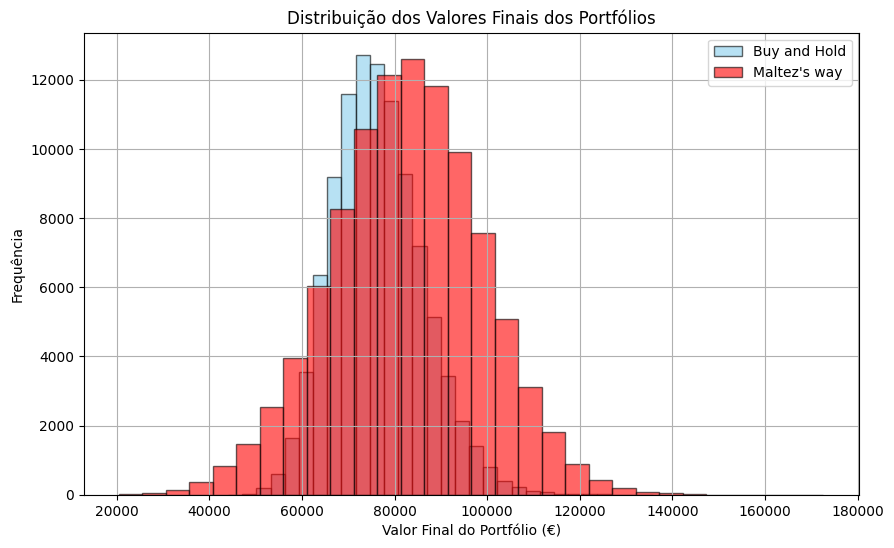

In [ ]:
plt.figure(figsize=(10, 6))

# Histograma do primeiro portfólio
plt.hist(final_values1, bins=30, edgecolor='black', color='skyblue', alpha=0.6, label='Buy and Hold')

# Histograma do segundo portfólio
plt.hist(final_values2, bins=30, edgecolor='black', color='red', alpha=0.6, label="Maltez's way")

plt.title('Distribuição dos Valores Finais dos Portfólios')
plt.xlabel('Valor Final do Portfólio (€)')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True)
plt.show()

No kernel connected

No kernel connected

No kernel connected

No kernel connected

No kernel connected

No kernel connected